In [1]:
#import statements
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MeanShift
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


import time
import math
import statistics
from scipy.spatial import distance

## The Main Research Question: How well can your predict if the general audience will like something based on if the critics liked something?

In [2]:
#importing rotten tomatoes data
rotten = pd.read_csv("rotten_tomatoes_movies_Mark.csv", sep=',')
print(rotten.head())
print(rotten.columns)

                     rotten_tomatoes_link  \
0                              /m/0814255   
1                              /m/0878835   
2                                   /m/10   
3                 /m/1000013-12_angry_men   
4  /m/1000079-20000_leagues_under_the_sea   

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus  \

## Investigating Potential Variables

Below is how I investigated the different variables relating to the audience and the critics to determine which variables I should use to determine the true audience and critics opinion on a movie. The two variables I decided on to determine the critics opinion are tomatometer rating and tomatometer count. The audience opinion will be the ouput binary variable and will be the audience status variable.

Text(0, 0.5, 'Positive Audience Count')

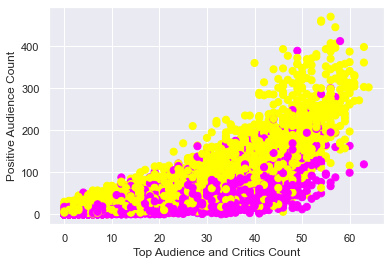

In [21]:
rotten['audience_status'] = rotten['audience_status'].replace(['Spilled'], 0)

rotten['audience_status'] = rotten['audience_status'].replace(['Upright'], 1)


plt.scatter(rotten["audience_top_critics_count"], rotten["audience_fresh_critics_count"], c=rotten["audience_status"], s=50, cmap="spring")
plt.xlabel('Top Audience and Critics Count')
plt.ylabel('Positive Audience Count')

Text(0, 0.5, 'Positive Audience Count')

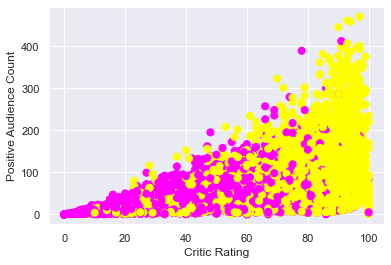

In [20]:
plt.scatter(rotten["tomatometer_rating"], rotten["audience_fresh_critics_count"], c=rotten["audience_status"], s=50, cmap="spring")
plt.xlabel('Critic Rating')
plt.ylabel('Positive Audience Count')

Text(0, 0.5, 'Critic Count')

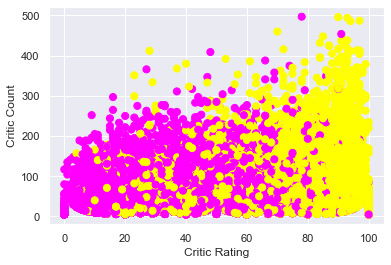

In [18]:
plt.scatter(rotten["tomatometer_rating"], rotten["tomatometer_count"], c=rotten["audience_status"], s=50, cmap="spring")
plt.xlabel('Critic Rating')
plt.ylabel('Critic Count')

Text(0, 0.5, 'Audience Count')

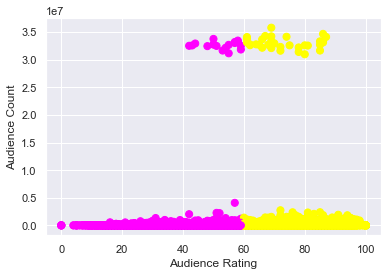

In [19]:
plt.scatter(rotten["audience_rating"], rotten["audience_count"], c=rotten["audience_status"], s=50, cmap="spring")
plt.xlabel('Audience Rating')
plt.ylabel('Audience Count')

## Graphing and Fitting kNN and Logistic Regression Models

Here, I am fitting the data to each of the models I want to analyze. I am doing this to understnad how each of the models will potentially look beofre deciding which ones I want to continue the analysis with in the next cross validation step. I am fitting and graphing the data with the kNN and logistic regression models.

Text(0, 0.5, 'Critic Count')

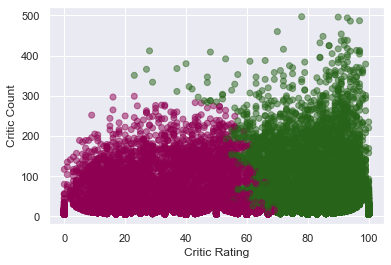

In [7]:
##doing the models with all the data --- kNN, Logistic Regression

rotten_pd = rotten.loc[:, ['tomatometer_rating', 'tomatometer_count', 'audience_status']] 
rotten_np = rotten_pd.to_numpy()
rotten_np = rotten_np.astype(int)

##knn model

knn = KNeighborsClassifier(n_neighbors=70)

knn_fit = knn.fit(rotten_np[:,:2], rotten_np[:,2])

preds = knn_fit.predict(rotten_np[:,:2])


plt.scatter(rotten_np[:,0], rotten_np[:,1], c=preds, cmap = "PiYG", alpha = 0.5)
plt.xlabel('Critic Rating')
plt.ylabel('Critic Count')

Text(0, 0.5, 'Critic Count')

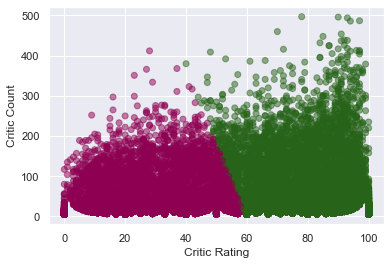

In [8]:
##Logistic Regression
lr = LogisticRegression()

lr = lr.fit(rotten_np[:,:2], rotten_np[:,2])

preds = lr.predict(rotten_np[:,:2])

plt.scatter(rotten_np[:,0], rotten_np[:,1], c=preds, cmap = "PiYG", alpha = 0.5)
plt.xlabel('Critic Rating')
plt.ylabel('Critic Count')

## Splitting the data into validation and Testing/Training Set

Here, I am splitting the data into the testing/training set and the validation set. The testing/training set will be used to find the cross validation error for each of the models. The validation set will be used after finding the better model to validate the model by checking the model against a set of data that the model has never seen before, which will be in the validation set.

In [9]:
##splitting the data into validation set and testing/training set




def splitting_valid_testrain(rotten_np):
    
    to_delete = []
    for val in range(len(rotten_np[:,0])):
        if rotten_np[val,0] <= 0 or rotten_np[val,1] <= 0 or rotten_np[val,2] < 0:
            to_delete.append(val)
            
    rotten_np = np.delete(rotten_np, to_delete, 0)
    
    

    valid_size = int(len(rotten_np[:,0])/10)

    valid_indexs = np.random.choice(range(len(rotten_np[:,0])), size= valid_size, replace=False) 

    #creating the validation dataset

    validation_np = np.empty([valid_size, 3])

    for ind in range(valid_size):
        #index_val = valid_indexs[ind]
        validation_np[ind,:] = rotten_np[valid_indexs[ind],:]

    #creating the train/test dataset
    length = len(rotten_np[:,0])

    testtrain_np = np.empty([length-valid_size, 3])

    count = -1
    for ind in range(len(rotten_np[:,0])):
        if ind not in valid_indexs:
            count = count+1
            testtrain_np[count,:] = rotten_np[ind,:]

    validation_np = validation_np.astype(int)        
    testtrain_np = testtrain_np.astype(int)
    
    
    output = [validation_np, testtrain_np]
    
    return output

out = splitting_valid_testrain(rotten_np)

validation_np = out[0]  
print(validation_np.shape)
print(validation_np[:200, 1])
testtrain_np = out[1]
print(testtrain_np.shape)

(1604, 3)
[  9  12  60  45 135  14  39  10  77 133  25 147 104   6 222   5  10 189
   7 194  12  86  44  42   7  10  31  20  68 102 123  12 136  54 264 111
  19  29  24   7   9  98  22   6  36  13  35 119  28   7  83 122 102  92
  28  95  40 202 197  27  13  17   6  29  46  20  27  13 137  14   8 136
 129   6  12  15 297   9   6  30   8  19   6  67  17  17  21   8  35  47
  14  19  79  10  32  42   5 156  17 172  53  74  15  10  29  42  51  16
  27  86  16  15  18  19  58  49 107  85 143  21 101  73  27   9  35   7
 153  21   5 132  11 167  12   8  43 103 154  67  24   5  15  26  13  96
   5  13 143 149   7  26  12  13  20  13  40   7  17 118  37  13  17  11
  94 300  16  25  10 129   8   6  38   7   8  22  11  75 167  23   5  21
   5 101  21  27  24   7   8   7  16   7  24 198  12  16  13   5  52 174
  14  14]
(14443, 3)


## Cross Validation on Training/Testing Data

Here, I am performing k-fold cross validation on the kNN model and the logistic regression model to find the error that exists in each model when testing and training the model with the test/train dataset. In each function, the data is split into multiple groups and part of the data is fit to the model and a different part of the data is trained against the model to find the error of the model. This process happens a k number of times, and all of these errors from these various test/train sessions are averaged into a single cross validation error.

In [10]:
##doing cross val on train data

#kNN cross val

def kNN_crossval_k_fold(data, k, n_neighbors):
   
    #splitting data into k equal pieces
    
    length = len(data[:,1])/k
    size = int(length)

    k_groups = []
  
    for x in range(k): 
        new_group = np.empty([size, 3])
        
        for num in range(size):    
            new_group[num,:] = data[x+(k*num),:]
        k_groups.append(new_group)

    # Initialize the list of errors
    test_errors = []
    
    for val in range(k):
        
        # Split data into train and test
        
        test_data = k_groups[val]
        
        for_train = []
        for num in range(k):
            if num != val:
                for_train.append(k_groups[num])
        
        for_train = tuple(for_train)     
        train_data = np.vstack(for_train)
        
        # Create and train a model
        # Create the details of the model
       
        # Set up the particulars for the knn neighbors classification
        knn = KNeighborsClassifier(n_neighbors = n_neighbors)

        # Fit the kNN model to the data
        knn_fit = knn.fit(train_data[:,[0,1]], train_data[:,2])

        # Compute the testing error and add it to the list of testing errors
      
        #predicting kNN model data
        preds = knn_fit.predict(test_data[:,:2])
        
        res_MSE = np.mean((test_data[:,2]-preds)**2)
        
        test_errors.append(res_MSE)
        
    # Compute the cross-val error
    cross_val = statistics.mean(test_errors)
    
    return cross_val

In [11]:
#logistic regression cross val


def logreg_crossval_k_fold(data, k):
   
    #splitting data into k equal pieces
    
    length = len(data[:,1])/k
    size = int(length)

    k_groups = []
  
    for x in range(k): 
        new_group = np.empty([size, 3])
        
        for num in range(size):    
            new_group[num,:] = data[x+(k*num),:]
        k_groups.append(new_group)

    # Initialize the list of errors
    test_errors = []
    
    for val in range(k):
        
        # Split data into train and test
        
        test_data = k_groups[val]
        
        for_train = []
        for num in range(k):
            if num != val:
                for_train.append(k_groups[num])
        
        for_train = tuple(for_train)     
        train_data = np.vstack(for_train)
        
        # Create and train a model
        # Create the details of the model
       
        # Set up the particulars for the logistic regression classification
        lr = LogisticRegression()

        # Fit the logistic regression model to the data
        lr_fit = lr.fit(train_data[:,[0,1]], train_data[:,2])

        # Compute the testing error and add it to the list of testing errors
      
        #predicting logistic regression model data
        preds = lr_fit.predict(test_data[:,:2])
       
        res_MSE = np.mean((test_data[:,2]-preds)**2)
        test_errors.append(res_MSE)
        
    # Compute the cross-val error
    cross_val = statistics.mean(test_errors)
    
    return cross_val


## Choosing a Model: kNN or Logistic Regression

In [12]:
##choose a model and tune it with all the train data

kNN_crossval = kNN_crossval_k_fold(testtrain_np, 20, 70)

print("kNN cross validation error:", kNN_crossval)

log_crossval = logreg_crossval_k_fold(testtrain_np, 20)

print("logistic cross validation error:", log_crossval)


kNN cross validation error: 0.24439058171745154
logistic cross validation error: 0.24778393351800554


After doing a 20 fold cross validation, it is clear that the errors are approximately the same for both models, although it is slightly higher for logistic regression. This means thatI will choose kNN as the model for the rest of my analysis because it has a lower error. 

I then did some analysis relating to how many points were placed in the wrong and right group for the kNN model specifically varying by the n_neighbors input. This shown below. As it turns out, approximately 24% of the point are placed in the wrong group. This means that when using the kNN model to predict audience opinion based on critics opinion and behavior, the model predicts it wrong 24% of the time.

number of wrongly classified points: 3456 out of 14443 % 0.23928546700823927


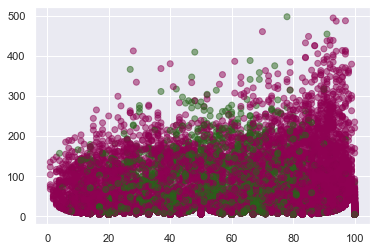

In [13]:
#checking kNN errors

knn = KNeighborsClassifier(n_neighbors=50)

knn_fit = knn.fit(testtrain_np[:,:2], testtrain_np[:,2])

preds = knn_fit.predict(testtrain_np[:,:2])

wrong_sides = []

for ind in range(len(preds)):
    if preds[ind] == testtrain_np[ind,2]:
        wrong_sides.append(0)
    else:
        wrong_sides.append(1)
              
print("number of wrongly classified points:", sum(wrong_sides), "out of", len(wrong_sides), "%", sum(wrong_sides)/len(wrong_sides))
    
plt.scatter(testtrain_np[:,0], testtrain_np[:,1], c=wrong_sides, cmap = "PiYG", alpha = 0.5)


## Tuning the kNN Model with All the Test/Train Data

In [14]:
def wrong_points(data, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn_fit = knn.fit(data[:,:2], data[:,2])

    preds = knn_fit.predict(data[:,:2])

    wrong_sides = []

    for ind in range(len(preds)):
        if preds[ind] == data[ind,2]:
            wrong_sides.append(0)
        else:
            wrong_sides.append(1)
  
    percentage_wrong = sum(wrong_sides)/len(wrong_sides)
    
    return percentage_wrong


def mse_calculate(data, n_neighbors):

    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    knn_fit = knn.fit(data[:,:2], data[:,2])

    preds = knn_fit.predict(data[:,:2])

    res_MSE = np.mean((data[:,2]-preds)**2)
    
    return res_MSE



Here I fit all of the test/train data to the kNN model and I see how much the mean square error and the percentage of wrong points vary depending on what the n_neighbors input is. I graphed the analysis and it seems that the lower n_neighbors yiels a lower mean squared error and lower percentage of incorrect predictions.

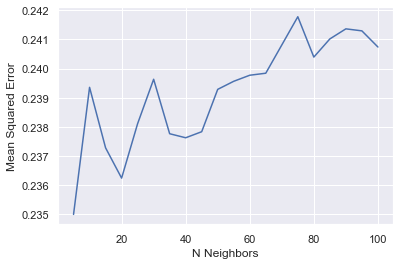

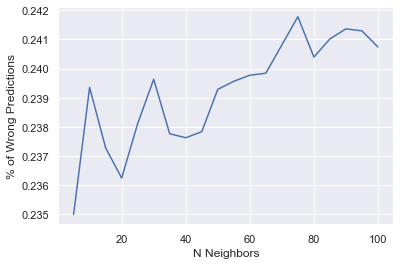

In [15]:
test_vals = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


error_vals = []

for val in test_vals:
    
    error = wrong_points(testtrain_np, val)
    error_vals.append(error)


plt.plot(test_vals, error_vals)
plt.xlabel('N Neighbors')
plt.ylabel('Mean Squared Error')
plt.show()


mse_vals = []

for val in test_vals:
    
    mse = mse_calculate(testtrain_np, val)
    mse_vals.append(mse)

plt.plot(test_vals, mse_vals)
plt.xlabel('N Neighbors')
plt.ylabel('% of Wrong Predictions')
plt.show()

## Checking Tuned kNN Model to Validation Set

After tuning the kNN model with all of the test/train dataset, I check this model with the validation set. This model has not seen the validation set yet, so testing the accuracy of the model with these points can help determine how good the model is with predicting new data it has not seen yet, given the old data it already has seen. Similar to the results above, the mean square error is around 0.22 and around 22% of the points were placed in the wrong group. This means that the model using critics data to predict audience opinions is pretty good, but only about 78% accurate. This means that you cannot accurately predict audience opinion using the critics opinion all of the time, particularly when the ratings are not particularly positive or negative on average. In the graph below, the green points are all of the points the model predicted incorrectly.

number of wrongly classified points in validation set: 360 out of 1604 % 0.22443890274314215
MSE: 0.22443890274314215


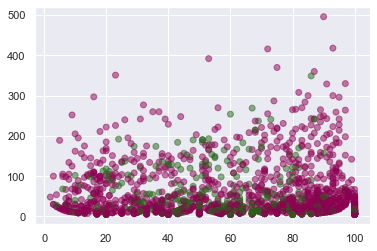

In [17]:
##test selected model on validation data
#checking kNN errors

knn = KNeighborsClassifier(n_neighbors=20)

knn_fit = knn.fit(testtrain_np[:,:2], testtrain_np[:,2])

preds = knn_fit.predict(validation_np[:,:2])

wrong_sides = []

for ind in range(len(preds)):
    if preds[ind] == validation_np[ind,2]:
        wrong_sides.append(0)
    else:
        wrong_sides.append(1)
              
print("number of wrongly classified points in validation set:", sum(wrong_sides), "out of", len(wrong_sides), "%", sum(wrong_sides)/len(wrong_sides))
    
    
#calculate mse for validation set
    
res_MSE = np.mean((validation_np[:,2]-preds)**2)   
    
print("MSE:", res_MSE)    
    
plt.scatter(validation_np[:,0], validation_np[:,1], c=wrong_sides, cmap = "PiYG", alpha = 0.5)
